#             #GRIPMAR21-THE SPARKS FOUNDATION 

# Linear Regression with Python Scikit Learn-Prediction using Supervised ML

# Author:Agrata Dwivedi

# Task 1:Predict the percentage of student based on the number of study hours.

In this regression task we will predict the percentage of marks that a student is expected to score based on the number of study hours they studied.This is a simple linear regression task as it involves just 2 variables

# Loading the necessary libraries #

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset #

In [7]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The data has successfully imported

# Dataset size 

In [8]:
df.shape

(25, 2)

As computed above there are 25 rows and 2 columns in our dataset 'Hours' is the independent variable and 'scores' is dependent variable

# Information-Understanding the dtypes,null values in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Both the columns are numerical in type and there are no null values

# Describe-Statistical Details

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above table we can observe that the data is slightly right skewed as mean>median(50%)

# Exploratory data analysis- Label Encoding

# Bivariate Analysis

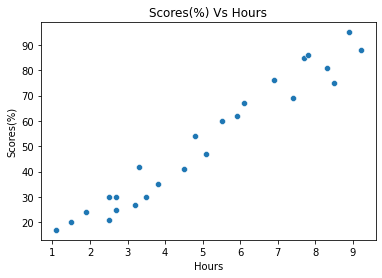

In [14]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) Vs Hours')
plt.show()

From the above scatterplot it is observed that scores are highly positively correlated with number of hours spent in studying.As the number of hours increases so shall the marks increase.

# Multivariate Analysis

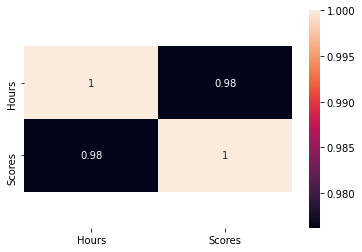

In [18]:
ax=sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

From the heatmap it is observed that the correlation is highly positive and the value of correlation between the hours of study and scores is 0.98

# Preparing data modeling 

In [22]:
X=df[['Hours']]
Y=df[['Scores']]

# Splitting the data into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
Xtrain.shape,Ytest.shape

((20, 1), (5, 1))

# Using Linear Regression for building the model and prediction

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression(fit_intercept=True)

# Fitting the model

In [28]:
lr.fit(Xtrain,Ytrain)

LinearRegression()

In [33]:
#LinearRegression intercept
lr.intercept_

array([2.01816004])

In [34]:
#LinearRegression Coefficient for hours
lr.coef_

array([[9.91065648]])

The equation will be:
1. Scores = intercept + coefficient*(Hours)
2. Scores= 2.01816004 + 9.91065648*(Hours)

# Plotting the regression line

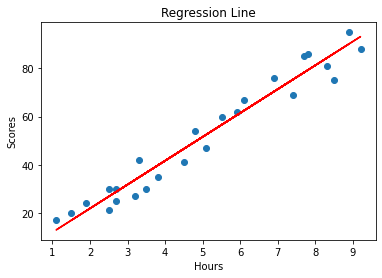

In [35]:
plt.scatter(X,Y)
plt.plot(X,lr.predict(X),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

# Predicting  Xtest

In [36]:
y_pred=lr.predict(Xtest)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [37]:
y_pred=y_pred.flatten()

In [39]:
data = pd.DataFrame({'Actual':Ytest.values.flatten(),'Prediction':y_pred})

In [40]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [41]:
lr.score(Xtest,Ytest)         #R2 value

0.9454906892105356

94% variation in the scores is explained by Hours

# Testing for new data

In [48]:
hours=np.array(9.25).reshape(1,-1)
result=lr.predict(hours)
hours.item()
result.item()

93.69173248737538

Thus, for No. of hours:9.25
Predicted score (%): 93.69173248737538

# Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
RMSE= mean_squared_error(Ytest,y_pred,squared=False)

In [51]:
print('The RMSE is: ',RMSE)

The RMSE is:  4.6474476121003665


In [52]:
MSE= mean_squared_error(Ytest,y_pred)

In [53]:
print('The MSE is: ',MSE)

The MSE is:  21.5987693072174


In [54]:
MAE= mean_absolute_error(Ytest,y_pred)

In [55]:
print('The MAE is: ',MAE)

The MAE is:  4.183859899002975
